<a href="https://colab.research.google.com/github/Suryanshagarwal30/Deeplearning_lab/blob/main/Suryansh_agarwal_DeepLearningLabAssignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name**: Suryansh Agarwal

**Roll no**: 69

**Batch**: DL4

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
from google.colab import files
files.upload()  # Upload your kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"suryanshagarwal13","key":"f7c652b53604a3929236122653040811"}'}

In [5]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c digit-recognizer
!unzip digit-recognizer.zip

Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [6]:
data = pd.read_csv('train.csv')

In [7]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape


In [8]:
Y_train

array([5, 8, 9, ..., 6, 1, 7])

Our NN will have a simple two-layer architecture. **Input layer ** a[0]
  will have 784 units corresponding to the 784 pixels in each 28x28 input image. A hidden layer  a[1]
  will have 10 units with ReLU activation, and finally our output layer  a[2]
  will have 10 units corresponding to the ten digit classes with softmax activation.

**Forward propagation**

Z[1]=W[1]X+b[1]

A[1]=gReLU(Z[1]))

Z[2]=W[2]A[1]+b[2]

A[2]=gsoftmax(Z[2])

**Backward propagation**

dZ[2]=A[2]−Y

dW[2]=1mdZ[2]A[1]T

dB[2]=1mΣdZ[2]

dZ[1]=W[2]TdZ[2].∗g[1]′(z[1])

dW[1]=1mdZ[1]A[0]T

dB[1]=1mΣdZ[1]

***Parameter updates***

W[2]:=W[2]−αdW[2]

b[2]:=b[2]−αdb[2]

W[1]:=W[1]−αdW[1]

b[1]:=b[1]−αdb[1]

Vars and shapes

Forward prop

A[0]=X
 : 784 x m
Z[1]∼A[1]
 : 10 x m
W[1]
 : 10 x 784 (as  W[1]A[0]∼Z[1]
 )
B[1]
 : 10 x 1
Z[2]∼A[2]
 : 10 x m
W[1]
 : 10 x 10 (as  W[2]A[1]∼Z[2]
 )
B[2]
 : 10 x 1
Backprop

dZ[2]
 : 10 x m (  A[2]
 )
dW[2]
 : 10 x 10
dB[2]
 : 10 x 1
dZ[1]
 : 10 x m (  A[1]
 )
dW[1]
 : 10 x 10
dB[1]
 : 10 x 1

In [9]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [10]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2


In [11]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)


Iteration:  0
[6 6 6 ... 6 9 5] [5 8 9 ... 6 1 7]
0.0714390243902439
Iteration:  10
[8 6 0 ... 8 9 7] [5 8 9 ... 6 1 7]
0.10612195121951219
Iteration:  20
[9 6 9 ... 0 9 7] [5 8 9 ... 6 1 7]
0.14668292682926828
Iteration:  30
[9 9 3 ... 0 3 7] [5 8 9 ... 6 1 7]
0.20151219512195123
Iteration:  40
[9 9 5 ... 6 3 7] [5 8 9 ... 6 1 7]
0.2612439024390244
Iteration:  50
[5 9 5 ... 6 3 7] [5 8 9 ... 6 1 7]
0.33670731707317075
Iteration:  60
[5 7 5 ... 6 1 7] [5 8 9 ... 6 1 7]
0.4084390243902439
Iteration:  70
[5 7 5 ... 6 1 1] [5 8 9 ... 6 1 7]
0.46751219512195125
Iteration:  80
[4 3 5 ... 6 1 7] [5 8 9 ... 6 1 7]
0.5187804878048781
Iteration:  90
[4 3 5 ... 6 1 7] [5 8 9 ... 6 1 7]
0.5597073170731708
Iteration:  100
[4 3 5 ... 6 1 7] [5 8 9 ... 6 1 7]
0.5918536585365853
Iteration:  110
[4 3 4 ... 6 1 7] [5 8 9 ... 6 1 7]
0.6179268292682927
Iteration:  120
[4 3 4 ... 6 1 7] [5 8 9 ... 6 1 7]
0.6404390243902439
Iteration:  130
[4 3 4 ... 6 1 7] [5 8 9 ... 6 1 7]
0.6600731707317073
Iteration:  

**~85% accuracy on training set.**

In [12]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [5]
Label:  5


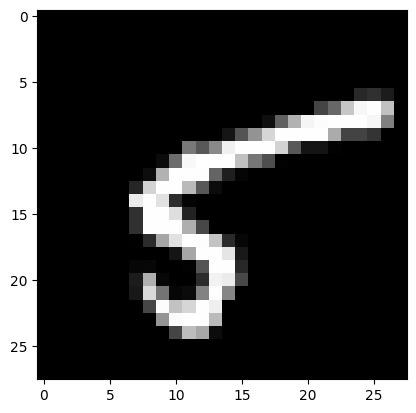

Prediction:  [8]
Label:  8


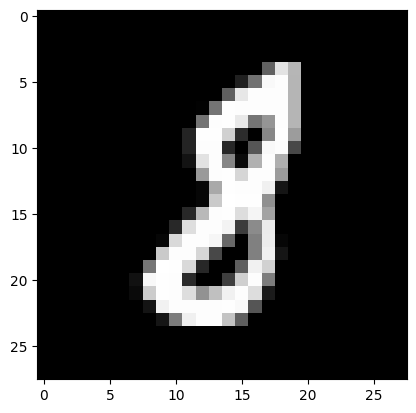

Prediction:  [9]
Label:  9


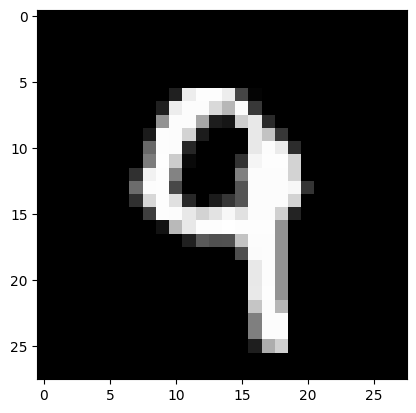

Prediction:  [8]
Label:  8


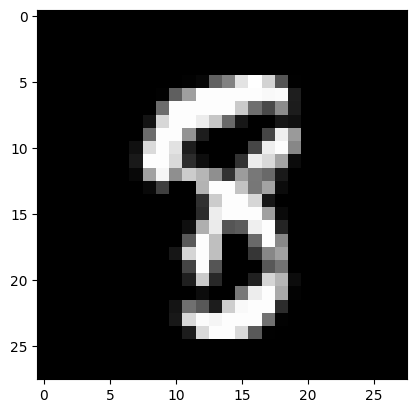

In [13]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)


In [14]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[6 8 1 0 4 8 5 4 2 1 9 6 1 7 0 4 6 6 4 7 1 7 5 5 7 6 9 9 5 3 8 3 6 9 0 1 7
 0 2 4 5 6 6 7 2 9 8 7 1 0 0 4 7 1 2 5 0 9 1 0 2 5 2 2 6 1 3 0 1 0 8 1 4 1
 3 3 0 7 7 1 1 5 5 2 9 3 7 1 3 3 6 1 1 1 5 7 4 6 1 7 7 6 6 5 9 9 1 0 7 3 8
 4 9 4 2 3 0 6 3 3 3 1 4 3 4 6 0 5 1 5 4 5 1 6 6 1 9 9 5 1 5 6 7 0 1 0 4 8
 8 5 4 4 7 1 3 8 7 5 6 2 6 4 3 6 7 4 7 9 6 9 2 1 0 3 6 7 3 9 4 8 9 0 7 0 8
 2 3 2 5 0 7 3 2 6 9 7 5 8 3 4 3 5 7 7 7 5 2 6 7 3 5 6 4 9 1 1 2 6 7 6 3 6
 2 1 5 6 3 3 6 9 4 1 1 9 4 8 3 0 8 4 1 9 6 3 0 0 0 3 3 7 6 0 9 1 7 1 6 4 0
 6 5 3 8 1 9 9 5 8 2 3 2 7 0 6 4 9 2 6 7 1 7 3 8 4 4 3 0 3 1 8 2 9 4 7 5 1
 9 3 0 9 6 0 1 6 8 0 8 3 9 6 3 0 0 1 3 3 1 4 3 7 6 5 6 6 9 8 1 2 0 4 3 3 1
 4 9 6 9 7 8 6 7 4 2 5 4 0 0 7 1 7 7 4 6 7 6 0 2 5 5 8 3 1 7 0 5 3 2 0 4 7
 3 7 0 2 3 4 2 8 7 9 1 1 2 8 2 1 1 1 3 7 2 8 2 9 0 0 4 3 1 0 3 3 0 8 2 4 3
 4 3 1 5 8 6 4 8 7 8 0 0 8 1 3 0 4 3 8 0 5 8 4 1 4 3 2 0 2 2 3 5 8 5 9 6 6
 2 7 3 5 1 8 9 4 6 3 8 5 8 2 7 6 2 7 0 1 2 7 9 4 5 4 2 2 2 2 7 5 4 9 3 2 5
 9 7 5 8 2 3 6 4 3 2 7 3 

np.float64(0.824)

Declaration:

I, Suryansh agarwal, confirm that the work submitted in this assignment is my own and has been completed
following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the
repository link is provided below:

GitHub Repository Link: [Insert GitHub Link]


Signature: Suryansh agarwal